# <center> Data Cleaning

As of the data is just pure JSON files. We cannot do some analysis on it. Because it might contains some wrong shapes for some drawings. 

So we need to visualize it first to have a clear overview of the data.

Then we can clean it and make it ready for analysis by deleting all the outliers and the wrong data.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json
import glob
import os,sys

We'll test first with one file to see the process and then we'll apply the same process to all the files.

In [6]:
with open('../newdata/json/715.json','r') as f:
    d = json.load(f)
    Xcar=[] # The X-axis coordinates of the draw
    ycar=[] # The y-axis coordinates of the draw
    for line in d['drawings']['fish']:
        print(len(line)) # the number of lines to draw this figure
        print(line)
        for point in line:
            #print(point[0])
            Xcar.append(point[0])
            ycar.append(point[1])

97
[[53, 125], [53, 126], [55, 129], [57, 132], [57, 134], [59, 139], [62, 144], [62, 146], [64, 149], [64, 151], [67, 155], [68, 158], [68, 160], [71, 164], [74, 169], [75, 171], [77, 174], [79, 177], [79, 179], [82, 184], [84, 188], [85, 189], [85, 191], [85, 192], [85, 194], [85, 197], [85, 198], [85, 199], [85, 201], [85, 202], [84, 204], [83, 207], [82, 208], [81, 209], [81, 213], [80, 214], [78, 218], [77, 220], [75, 223], [74, 225], [74, 226], [73, 229], [71, 232], [70, 234], [68, 238], [66, 243], [65, 244], [63, 249], [63, 252], [62, 254], [62, 255], [62, 256], [62, 258], [62, 259], [61, 261], [60, 265], [59, 268], [58, 270], [57, 271], [57, 272], [57, 273], [56, 275], [56, 276], [56, 277], [56, 278], [56, 279], [56, 280], [57, 281], [58, 282], [59, 282], [61, 282], [63, 282], [64, 282], [65, 282], [70, 280], [72, 279], [75, 278], [75, 277], [79, 274], [82, 270], [85, 266], [89, 262], [92, 260], [93, 258], [96, 257], [99, 255], [101, 253], [105, 250], [110, 247], [111, 246], [1

Here we're going to visualize the draw using the `matplotlib` library. And we'll save the draw as an image to see it clearly.

NB. the draws are taken from the `HTML canvas` element.

* And First what's the `HTML canvas` element?
    * Just to clearly understand some details when processing the data.
* Here is the defintion from the official MDN Web docs Documentation:

<img alt="canvas def" src="../imgs_for_notebooks/canvas.png">

* One of its properties is that its axis are starting from the top left corner as the (0,0) point to the bottom right point: (400,400) in our case which is the dimension of the canvas.

<p align="center">
  <img alt="canvas axis" src="https://developer.mozilla.org/en-US/docs/Web/API/Canvas_API/Tutorial/Drawing_shapes/canvas_default_grid.png" width="">
</p>

And so we have to take this into consideration when ploting the shapes normal x,y axis

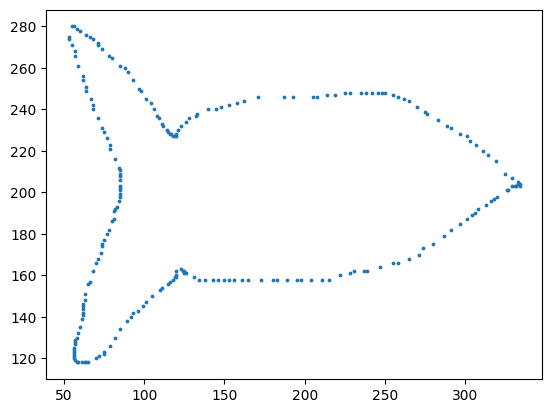

In [8]:
fig, ax = plt.subplots()

# Plot the data
ax.scatter(Xcar, [400 - y for y in ycar], s=3) # the 400 is the height of the canvas element in our case and its y-axis is reverted by default 
                                               # so we have to substract the point's y-coordinates from the height of the image
#save the plot
plt.savefig('../newdata/imgs/0.png')

plt.show()

To clean the data we must visualize it to see if there is any false/wrong drawing to delete


And for that we're going to save the plots as images and then check for wrong images manually <span style="color:red;"> *UNFORTUNATELY*</span>

Session : 0


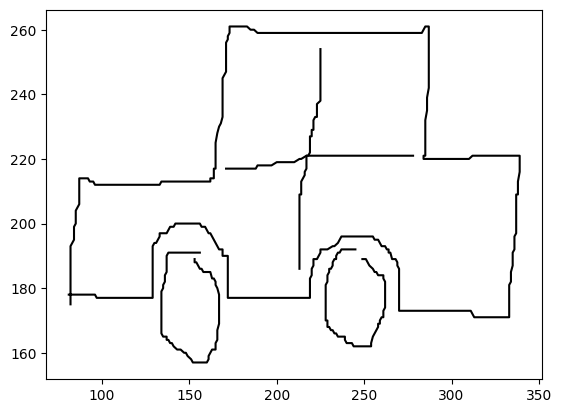

In [20]:
files = '../newdata/json/*'
for j,file in enumerate(glob.glob(files)):
    
    with open(file,'r') as f:
        d = json.load(f)
        print(f"Session : {d['session']}")
        #os.makedirs(f"newdata/imgs/{d['session']}",exist_ok=True)
        drawings=['bicycle','car','clock','fish','guitar','house','pencil','tree']
        for draw in drawings[1:]:
            fig, ax = plt.subplots()
            for path in d['drawings'][draw]:
                # print(path)
                # print(len(path))
                path = np.array(path)
                ax.plot(path[:, 0], 400-path[:,1], color='k')
            # break
            fig.savefig(f"../newdata/imgs/{d['session']}_{draw}.png")
        break

In [3]:
len(glob.glob('../newdata/imgs/*')) # the number of images that we've got

5727

So after a tough identification of all the wrong draws and storing its coordinate into a txt file.

- Let's see all the shapes that need to be deleted

In [8]:
with open('data_cleaning.txt') as file: # the txt files contains all the elements that needs to be deleted
    for raw in file.readlines()[:10]:
        try:
            print(f"session : {raw.split('_')[0]} --> draw : {raw.split('_')[1]}")
        except:
            print(f"session {raw} will be deleted completely")

session : 4 --> draw : clock

session : 2 --> draw : pencil

session : 9 --> draw : guitar

session : 12 --> draw : pencil
session : 16 --> draw : fish

session : 42 --> draw : house

session : 44 --> draw : fish

session : 47 --> draw : house

session 54
 will be deleted completely
session : 57 --> draw : pencil



- Let's delete them!

In [11]:
with open('data_cleaning.txt','r') as file: 
    for raw in file.readlines():
        raw = raw.strip()
        sess = raw.split('_')[0]
        draws = raw.split('_')[1:]
        print(sess)
        print(draws)
        path = f"../newdata/json/{sess}.json"
        if len(draws): # if len(draws)==0: this session will be completely deleted with all its drawing
            with open(path,'r') as jfile: # read the json file
                d = json.load(jfile)
                for dr in draws:
                    del d['drawings'][dr]
                print(d['drawings'].keys())
                with open(path,'w') as jfileout: # Rewrite the json file with updated elements
                    json.dump(d,jfileout,indent=2)   
                    print(path+' is updated!')  
        else:
            os.remove(f"../newdata/json/{sess}.json")
            print(path + " is removed!!")

4
['clock']
dict_keys(['car', 'fish', 'house', 'tree', 'bicycle', 'guitar', 'pencil'])
newdata/json/4.json is updated!
2
['pencil']
dict_keys(['car', 'fish', 'house', 'tree', 'bicycle', 'guitar', 'clock'])
newdata/json/2.json is updated!
9
['guitar']
dict_keys(['car', 'fish', 'house', 'tree', 'bicycle', 'pencil', 'clock'])
newdata/json/9.json is updated!
12
['pencil', 'guitar']
dict_keys(['car', 'fish', 'house', 'tree', 'bicycle', 'clock'])
newdata/json/12.json is updated!
16
['fish']
dict_keys(['car', 'house', 'tree', 'bicycle', 'guitar', 'pencil', 'clock'])
newdata/json/16.json is updated!
42
['house']
dict_keys(['car', 'fish', 'tree', 'bicycle', 'guitar', 'pencil', 'clock'])
newdata/json/42.json is updated!
44
['fish']
dict_keys(['car', 'house', 'tree', 'bicycle', 'guitar', 'pencil', 'clock'])
newdata/json/44.json is updated!
47
['house']
dict_keys(['car', 'fish', 'tree', 'bicycle', 'guitar', 'pencil', 'clock'])
newdata/json/47.json is updated!
54
[]
newdata/json/54.json is removed!

#### And now we have a clean data ready for analysis.

### Previous Notebook : [Data Preparation](Data_preparation.ipynb)
### Next Notebook : [Feature Extraction](Feature_Extraction.ipynb)